In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Dataset Distribution Visualization

In [2]:
url_data = pd.read_csv("../src/data/URL_data.csv")

scores_neg = list(url_data[url_data['label'] == -1]['score'])
scores_pos = list(url_data[url_data['label'] == 1]['score'])
total_neg, total_pos = len(scores_neg), len(scores_pos)

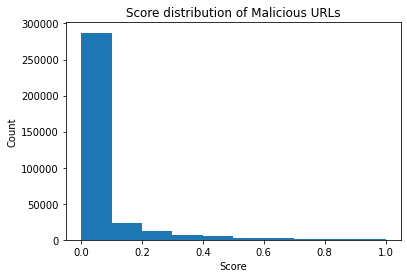

In [9]:
plt.hist(scores_neg);
plt.title('Score distribution of Malicious URLs');
plt.xlabel('Score');
plt.ylabel('Count');
plt.savefig("imgs/url-mal.png")

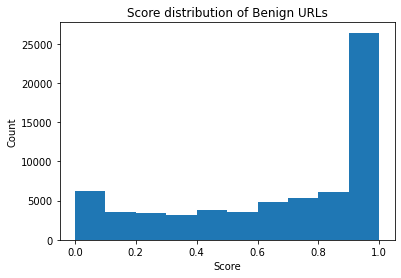

In [8]:
plt.hist(scores_pos);
plt.title('Score distribution of Benign URLs');
plt.xlabel('Score');
plt.ylabel('Count');
plt.savefig("imgs/url-ben.png")

In [19]:
len(url_data[url_data['label'] == 1][url_data['score'] > 0.7])/(1.*total_pos)

/Users/johnyang/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.5706409580477517

### Evaluation on URL Dataset

In [3]:
# Import Files
data_path, files = "../src/test_runs/", ["naive", "learned", "sandwich", "adaptive", "disjoint"]

def read_file(path):
    file = open(path, 'r')
    lines = file.readlines()
    fpr_list = []
    for line in lines:
        fpr = None
        if line.startswith("False positive rate:"):
            fpr = float(line.split(": ")[1]) 
        if "FPR" in line:
            fpr = float(line.split(";")[1].strip()[6:])
        if fpr != None:
            if path.endswith("adaptive.txt") or path.endswith("disjoint.txt"):
                fpr = fpr * 100
            fpr_list.append(fpr)
    return fpr_list

fpr_map = {}
for file in files:
    fpr_map[file] = read_file(data_path + file + ".txt")

In [4]:
fpr_map

{'naive': [48.55292503748561,
  35.75184382785333,
  23.584465152161115,
  16.93595399058582,
  11.36314200447217,
  8.135464430001248,
  5.589343356564259,
  3.954477826211793,
  2.6867827342886725],
 'learned': [11.759024823157839,
  5.396187343930812,
  3.3317962059054698,
  2.238695587864234,
  1.5716402889799563,
  1.1200728540395999,
  0.8196079454986819,
  0.6122407547585695,
  0.44837717046743175],
 'sandwich': [10.748871081412648,
  4.922868105765968,
  3.288292599456495,
  2.226224554015528,
  1.4318487002572513,
  1.0081235734442384,
  0.7653734494589601,
  0.5965794564369387,
  0.4437367857795411],
 'adaptive': [7.157793381071291,
  3.1693827418292977,
  1.7415943781739507,
  1.0722188869457279,
  0.6818465250769289,
  0.4446068579085206,
  0.3007549325839112,
  0.2021467579662354,
  0.14211178106665043],
 'disjoint': [4.033074341,
  2.284229362,
  1.328890164,
  0.9082744150000001,
  0.209687383,
  0.063225241,
  0.039733293,
  0.047853967000000004,
  0.030452524]}

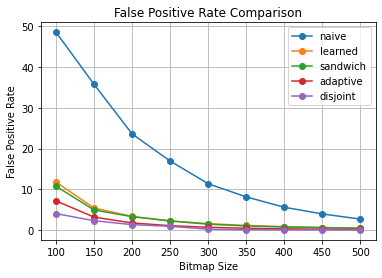

In [80]:
# Create FPR line graph
sizes = np.arange(100, 501, 50)

for key, value in fpr_map.items():
    plt.plot(sizes, value, label=key, marker='o')

plt.title("False Positive Rate Comparison")
plt.ylabel("False Positive Rate")
plt.xlabel("Bitmap Size")
plt.legend()
plt.grid(True)
plt.savefig("imgs/fpr.png")

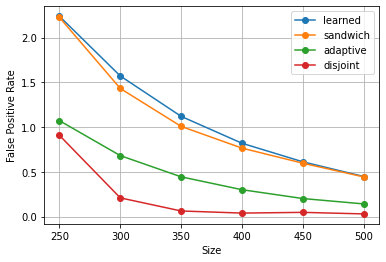

In [83]:
# FPR line graph of just high performing models, zoomed into 350-500
for key, value in fpr_map.items():
    if key != "naive":
        plt.plot(sizes[3:], value[3:], label=key, marker='o')

plt.ylabel('False Positive Rate')
plt.xlabel('Size')
plt.legend()
plt.grid()
plt.savefig('imgs/fpr-zoom.png')

In [15]:
# Table of Sandwiched vs. Learned
l_r, s_r = fpr_map["learned"], fpr_map["sandwich"]
l_nums = [total_neg * (l/100.) for l in l_r]
s_nums = [total_neg * (s/100.) for s in s_r]
ratio = [l/s for l, s in zip(l_nums, s_nums)]
for i, j, k in zip(l_nums, s_nums, ratio):
    print(i, j, k)

40545.0 37062.0 1.093977659057795
18606.0 16974.0 1.096147048427006
11488.0 11338.0 1.0132298465337801
7719.0 7676.0 1.0056018759770713
5419.0 4937.0 1.0976301397609884
3862.0 3475.9999999999995 1.111047180667434
2826.0000000000005 2639.0 1.0708601743084503
2111.0 2057.0 1.026251823043267
1546.0 1530.0 1.0104575163398692


### Hyperparameter Tuning Viz

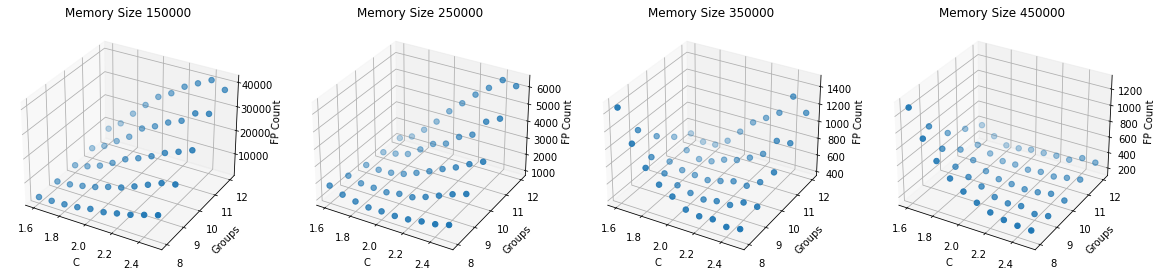

In [11]:
fig = plt.figure(figsize=(20, 16))
i = 1
ALL_RUNS = range(100000, 500001, 50000) # Set subplot to 3, 3
SOME_RUNS = range(150000, 450001-3, 100000) # Set subplot to 2, 2
for mem_size in [150000, 250000, 350000, 450000]:
    filename = "../src/test_runs/adaptive_runs/Ada-BF-" + str(mem_size) + ".txt"
    data = pd.read_csv(filename, sep=',')
    c, fp_items, groups = list(data['c']), list(data['fp_items']), list(data['groups'])
    ax = fig.add_subplot(1, 4, i, projection='3d')
    ax.scatter(c, groups, fp_items, s=30)
    ax.set_xlabel('C');
    ax.set_ylabel('Groups');
    ax.set_zlabel('FP Count');
    ax.set_title('Memory Size ' + str(mem_size));
    i += 1
fig.savefig('imgs/ad-bf-5.png')